In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import stats


In [2]:
data = pd.read_csv('Walmart Data.csv')

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
data.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [10]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [11]:
data.isnull().sum()
data['CPI'].fillna(data['CPI'].mean(), inplace=True)

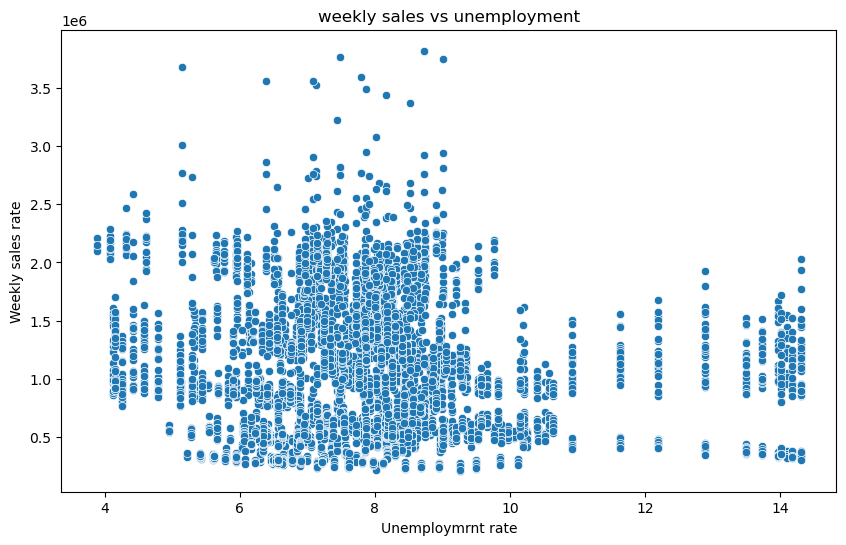

In [12]:
##Scatter plot of Weekly_Sales vs. Unemployment

plt.figure(figsize=(10,6))
sns.scatterplot(data = data,x='Unemployment',y='Weekly_Sales')
plt.title('weekly sales vs unemployment')
plt.xlabel('Unemploymrnt rate')
plt.ylabel('Weekly sales rate')
plt.show()

In [13]:
## Correlation

correlation_all = data['Weekly_Sales'].corr(data['Unemployment'])
print('correlation between weekly sales vs unemployment:',correlation_all)

correlation between weekly sales vs unemployment: -0.10617608965795416


In [14]:
# Identify stores suffering the most

store_correlation = data.groupby('Store')['Weekly_Sales','Unemployment'].corr().iloc[0::2,-1].reset_index()
store_correlation.rename(columns={'Unemployment':'Correlation'},inplace=True)
store_correlation

C:\Users\Suren\AppData\Local\Temp\ipykernel_2392\2211407219.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_correlation = data.groupby('Store')['Weekly_Sales','Unemployment'].corr().iloc[0::2,-1].reset_index()


,Store,level_1,Correlation
0,1,Weekly_Sales,-0.097955
1,2,Weekly_Sales,0.066325
2,3,Weekly_Sales,-0.230413
3,4,Weekly_Sales,-0.337015
4,5,Weekly_Sales,-0.207043
5,6,Weekly_Sales,0.044251
6,7,Weekly_Sales,-0.165382
7,8,Weekly_Sales,-0.052580
8,9,Weekly_Sales,-0.191534
9,10,Weekly_Sales,0.131908


In [15]:
store_correlation = store_correlation.sort_values(by = 'Correlation')

<function matplotlib.pyplot.show(close=None, block=None)>

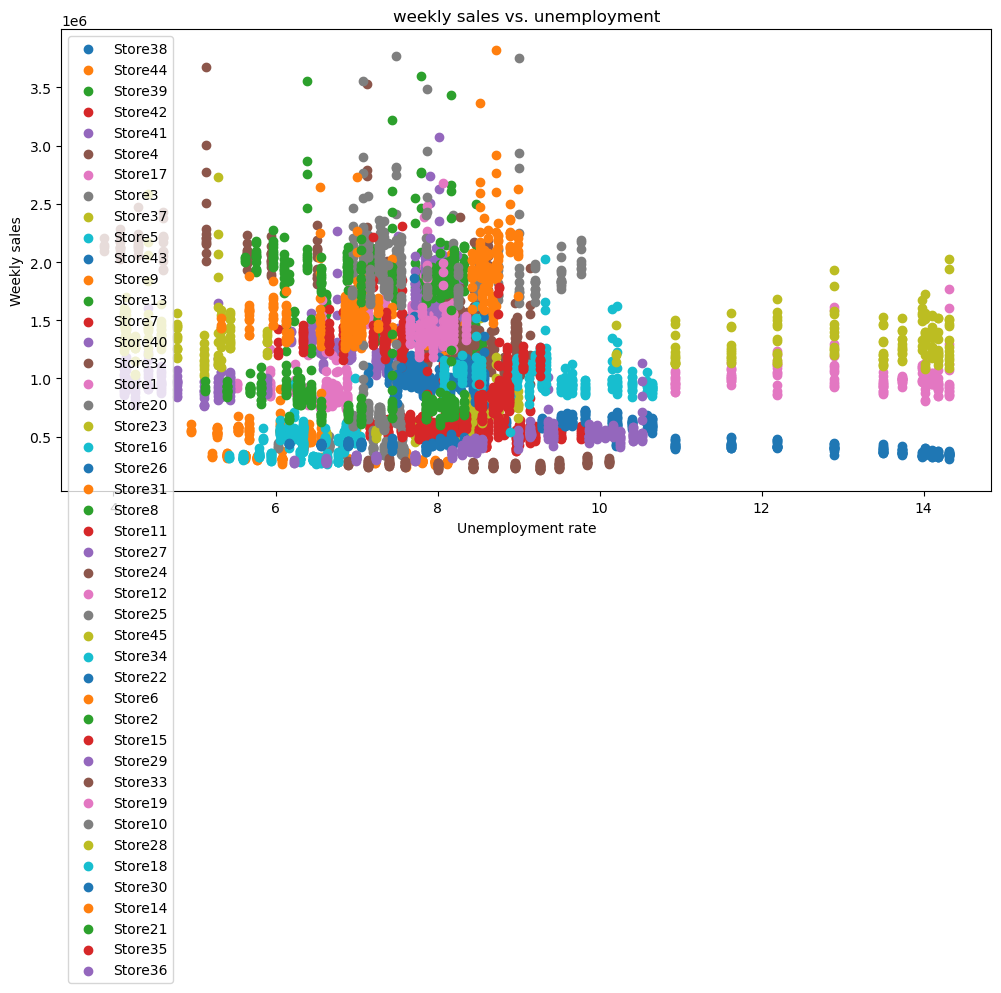

In [16]:
# Create a scatter plot to visualize the relationship

plt.figure(figsize=(12,6))

for store in store_correlation['Store']:
    store_data = data[data['Store']==store]
    plt.scatter(store_data['Unemployment'],store_data['Weekly_Sales'],label=f'Store{store}')
plt.xlabel('Unemployment rate')
plt.ylabel('Weekly sales')
plt.title('weekly sales vs. unemployment')
plt.legend()
plt.show

In [17]:

# Perform hypothesis testing to check statistical significance

p_values = {}
for store in store_correlation['Store']:
    store_data = data[data['Store']==store]
    corr, p_value = stats.pearsonr(store_data['Unemployment'],store_data['Weekly_Sales'])
    p_values[store] = p_value
    p_value

C:\Users\Suren\AppData\Local\Temp\ipykernel_2392\3809665859.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  corr, p_value = stats.pearsonr(store_data['Unemployment'],store_data['Weekly_Sales'])


In [18]:
# Identify stores with significant negative correlation (p-value < 0.05)

significant_store = [store for store, p_value in p_values.items() if p_value < 0.05]

In [19]:
p_value

3.4366072558381475e-38

In [20]:
print('store suffering the most from unemployment:')
for store in significant_store:
    print(f"Store {store} - Correlation: {store_correlation[store_correlation['Store']==store]['Correlation'].values[0]:.2f}")


store suffering the most from unemployment:
Store 38 - Correlation: -0.79
Store 44 - Correlation: -0.78
Store 39 - Correlation: -0.38
Store 42 - Correlation: -0.36
Store 41 - Correlation: -0.35
Store 4 - Correlation: -0.34
Store 17 - Correlation: -0.26
Store 3 - Correlation: -0.23
Store 37 - Correlation: -0.22
Store 5 - Correlation: -0.21
Store 43 - Correlation: -0.20
Store 9 - Correlation: -0.19
Store 13 - Correlation: -0.17
Store 7 - Correlation: -0.17
Store 30 - Correlation: 0.20
Store 14 - Correlation: 0.21
Store 21 - Correlation: 0.22
Store 35 - Correlation: 0.48
Store 36 - Correlation: 0.83


In [21]:
    from statsmodels.tsa.seasonal import STL
    import statsmodels.api as sm

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

C:\Users\Suren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Suren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Suren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Suren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [23]:
weekly_sales = data['Weekly_Sales'].resample('W').mean()



In [24]:
data['Weekly_Sales'].fillna(method='ffill', inplace=True)

In [25]:
decomposition = sm.tsa.seasonal_decompose(weekly_sales, model = 'additive')
seasonal_component = decomposition_seasonal

ValueError: This function does not handle missing values

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data['Weekly_Sales'], model='additive', period=52)  # Assuming a yearly seasonality

# Access the individual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid


In [36]:
seasonal

Date
2010-05-02     1163.106180
2010-12-02   -12023.245259
2010-02-19    -6766.584890
2010-02-26    61112.300249
2010-05-03    11992.221350
                  ...     
2012-09-28   -49612.919127
2012-05-10    -3187.610838
2012-12-10   -61124.493203
2012-10-19   -62831.849809
2012-10-26   -91535.644236
Name: seasonal, Length: 6435, dtype: float64

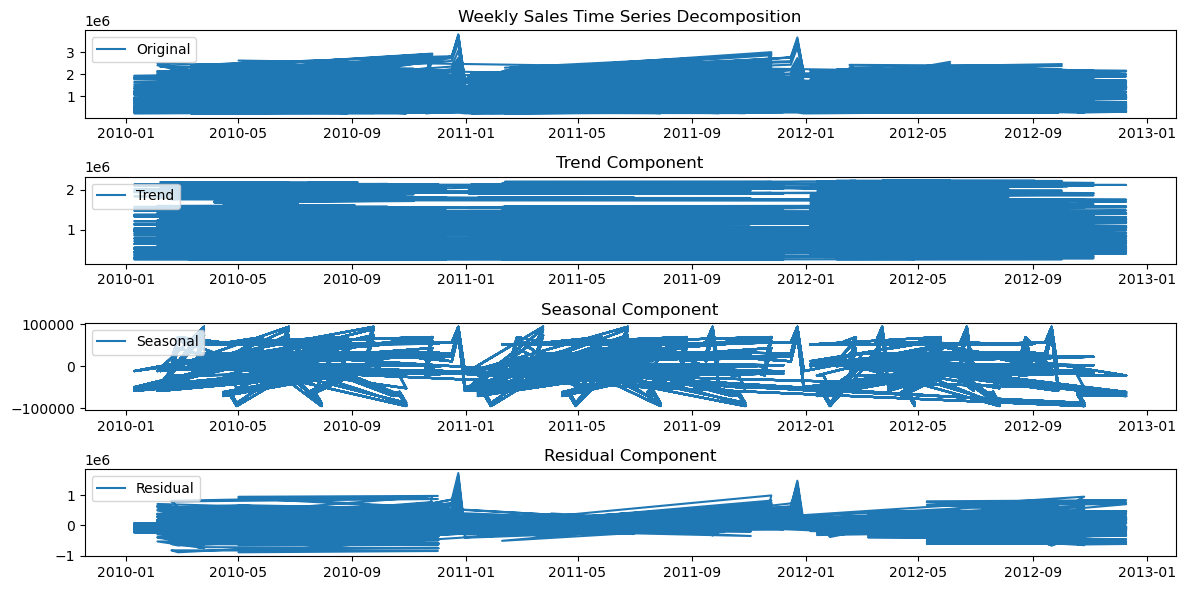

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data['Weekly_Sales'], label='Original')
plt.legend(loc='upper left')
plt.title('Weekly Sales Time Series Decomposition')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()